In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-13-08_26_35/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

41001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

# Accuracy
accuracy = { k: v for k, v in enumerate(data["accuracy"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

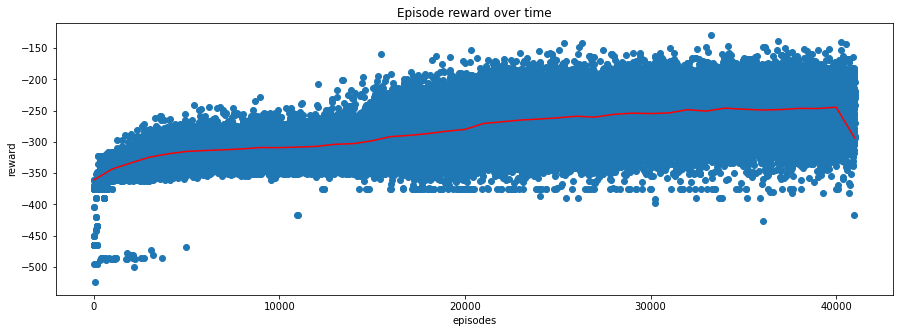

Maximum: -129.4
Average: -282.8367844686385
Moving Average (simple): {0: -361.0007992007992, 1000: -343.410989010989, 2000: -333.6913086913087, 3000: -324.46433566433564, 4000: -319.13666333666333, 5000: -315.25714285714287, 6000: -313.76183816183817, 7000: -312.614985014985, 8000: -311.2243756243756, 9000: -308.9742257742258, 10000: -309.1842157842158, 11000: -308.25814185814187, 12000: -307.1236763236763, 13000: -303.7758241758242, 14000: -302.78141858141856, 15000: -298.1924075924076, 16000: -291.5018981018981, 17000: -289.55024975024975, 18000: -286.7024975024975, 19000: -282.9256743256743, 20000: -280.0027972027972, 21000: -270.55924075924077, 22000: -267.803996003996, 23000: -265.02437562437564, 24000: -263.4073926073926, 25000: -261.43596403596405, 26000: -258.8937062937063, 27000: -260.33886113886115, 28000: -255.94345654345653, 29000: -253.9936063936064, 30000: -254.58101898101899, 31000: -253.6095904095904, 32000: -248.33526473526473, 33000: -250.6905094905095, 34000: -245.97

In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

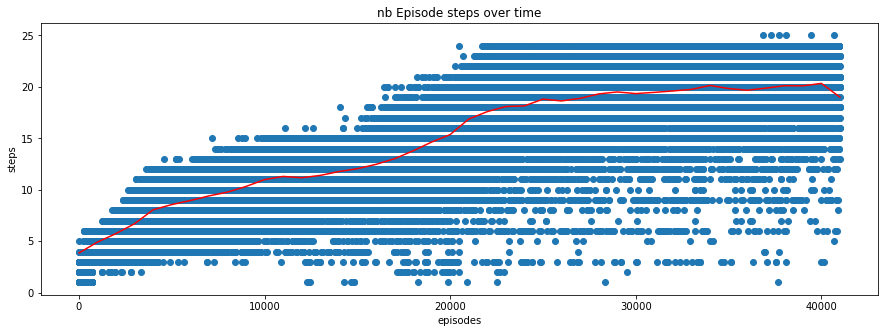

Maximum: 25
Average: 14.592448964659399
Moving Average (simple): {0: 3.865134865134865, 1000: 4.9250749250749255, 2000: 5.751248751248752, 3000: 6.714285714285714, 4000: 8.063936063936064, 5000: 8.565434565434565, 6000: 8.955044955044954, 7000: 9.403596403596403, 8000: 9.774225774225775, 9000: 10.322677322677322, 10000: 10.99000999000999, 11000: 11.2987012987013, 12000: 11.172827172827173, 13000: 11.395604395604396, 14000: 11.77022977022977, 15000: 12.048951048951048, 16000: 12.467532467532468, 17000: 13.014985014985015, 18000: 13.780219780219781, 19000: 14.636363636363637, 20000: 15.362637362637363, 21000: 16.87112887112887, 22000: 17.59140859140859, 23000: 18.08891108891109, 24000: 18.15084915084915, 25000: 18.802197802197803, 26000: 18.63136863136863, 27000: 18.88011988011988, 28000: 19.30969030969031, 29000: 19.504495504495505, 30000: 19.343656343656345, 31000: 19.462537462537462, 32000: 19.598401598401598, 33000: 19.751248751248752, 34000: 20.132867132867133, 35000: 19.83516483516

In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
#plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")